# Probabilistic Principle Component Analysis

Probabilistic PCA (PPCA)

Get feature space from latent space.

*References*
* Bishop, C. M. (1999). Variational principal components. 9th International Conference on Artificial Neural Networks: ICANN ’99, 1999, 509–514. doi:10.1049/cp:19991160
* Tipping, M. E., & Bishop, C. M. (1999). Probabilistic Principal Component Analysis, 611–622.
* https://github.com/cangermueller/ppca

## Initialization

In [1]:
%load_ext autoreload
%autoreload 2
# tes

In [2]:
import numpy as np
import sklearn.datasets as ds
import os
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as plt_cm
import matplotlib.colors as plt_col
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [3]:
os.sys.path.append('../src/')
import pca

## Functions

In [4]:
import time

def convert_to_timestamp(x):
    """Convert date objects to integers
    
    convert_to_timestamp('2019-07-29T00:00:00')
    >>> 1564333200.0
    
    """
    x = pd.to_datetime(x)
    
    return time.mktime(x.timetuple())


def normalize(data):
    """Normalize the DF using min/max"""
    scaler = MinMaxScaler()
    return scaler.fit_transform(data)

def normalizeDate(data):
    data = data.apply(convert_to_timestamp)
    return normalize(data)

def npToDf(data, col=None):
    if col is None:
        col = [str(i) for i in range(data.shape[0])]
    
    return pd.DataFrame(
        data, 
        columns = col
    )

## Plotting functions

In [27]:
def plot_scatter(x, classes, ax=None):
    ax = plt.gca() if ax is None else ax
    cmap = plt_cm.jet
    norm = plt_col.Normalize(vmin=np.min(classes), vmax=np.max(classes))
    mapper = plt_cm.ScalarMappable(cmap=cmap, norm=norm)
    colors = mapper.to_rgba(classes)
    ax.scatter(x[0, :], x[1, :], color=colors, s=20)

def plot_digits(x, classes, ax=None):
    xx = x[0, :]
    yy = x[1, :]
    width = np.max(xx) - np.min(xx)
    height = np.max(yy) - np.min(yy)
    ax = plt.gca() if ax is None else ax
    ax.set_xlim([np.min(xx) - 0.1 * width, np.max(xx) + 0.1 * width])
    ax.set_ylim([np.min(yy) - 0.1 * height, np.max(yy) + 0.1 * height])
    cmap = plt_cm.jet
    norm = plt_col.Normalize(vmin=0, vmax=9)
    mapper = plt_cm.ScalarMappable(cmap=cmap, norm=norm)
    colors = mapper.to_rgba(range(10))
    for x1, x2, digit in zip(xx, yy, classes):
        ax.text(x1, x2, digit, color=colors[int(digit)])
         
def plot_mse(mse):
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(mse, linewidth=2, marker='s',markersize=5, markerfacecolor='red')
    ax.grid()
    ax.set_xlabel('Iteration')
    ax.set_ylabel('MSE')
    
def plot_grid(n, ncols=4, size=(5, 5)):
    nrows = int(np.ceil(n/float(ncols)))
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(size[0]*ncols, size[1]*nrows))
    ax = ax.ravel()
    return [fig, ax]

def plot_bppca(y, y_classes, maxit=7, *args, **kwargs):
    np.random.seed(0)
    bppca = pca.bppca.BPPCA(y, *args, **kwargs)
        
    fig, ax = plot_grid(maxit + 1)
    mse = [bppca.mse()]
    plot_scatter(bppca.transform(), y_classes, ax[0])
    for i in range(maxit):
        bppca.update()
        mse.append(bppca.mse())
        j = i + 1
        plot_scatter(bppca.transform(), y_classes, ax[j])
        ax[j].set_title('Iteration {}'.format(j))
    plot_mse(mse)
    return bppca

def basicScatter():
    np.random.seed(19680801)

    fig, ax = plt.subplots()
    for color in ['tab:blue', 'tab:orange', 'tab:green']:
        n = 750
        x, y = np.random.rand(2, n)
        x1, y1 = np.random.rand(2, n)
        scale = 200.0 * np.random.rand(n)
        scale = 50
        ax.scatter(x, y, c=color, s=scale, label=color, edgecolors='none')
        ax.scatter(x1, y1, c="orange", s=scale, label="orange", edgecolors='none')
        break

    ax.legend()
#     ax.grid(True)

    plt.show()


def scatterPlot(data):
    np.random.seed(19680801)

    fig, ax = plt.subplots()
    for d in data:
        ax.scatter(
            d['x'], 
            d['y'], 
            c=d['color'],
            label=d['label']
        )

    ax.legend() 
    plt.show()

# scatterPlot([1,2,3])
"""
scatterPlot([{
    "x": [1,1,5],
    "y": [1,2,3],
    "color": "blue",
    "label": "blue"
}])
"""
1

1

## 1 Dataset

In [6]:
try:
    open("file", "r").read()
except:
    print("no file")

no file


In [7]:
baseurl = "https://github.com/wildangunawan/Dataset-Saham-IDX/raw/master/Saham/Semua/{}.csv"

emiten = "ACES"
fname = f'{emiten}.csv'
try:
    open(fname, "r").read()
    df = pd.read_csv(fname)
except:
    print("no file")
    df = pd.read_csv(baseurl.format(emiten))
    df.to_csv(fname)
df

,Unnamed: 0,date,previous,open_price,first_trade,high,low,close,change,volume,...,bid_volume,listed_shares,tradeble_shares,weight_for_index,foreign_sell,foreign_buy,delisting_date,non_regular_volume,non_regular_value,non_regular_frequency
0,0,2019-07-29T00:00:00,1800.0,0.0,0.0,1825.0,1770.0,1800.0,0.0,3685600.0,...,268500.0,1.715000e+10,1.715000e+10,1.715000e+10,1020200.0,2954200.0,NaN,0.0,0.000000e+00,0.0
1,1,2019-07-30T00:00:00,1800.0,0.0,0.0,1830.0,1785.0,1805.0,5.0,4619600.0,...,25100.0,1.715000e+10,1.715000e+10,1.715000e+10,3823200.0,3442900.0,NaN,1885329.0,3.393592e+09,3.0
2,2,2019-07-31T00:00:00,1805.0,0.0,0.0,1840.0,1795.0,1835.0,30.0,6431600.0,...,30000.0,1.715000e+10,1.715000e+10,1.715000e+10,3322400.0,3889100.0,NaN,70.0,1.267000e+05,1.0
3,3,2019-08-01T00:00:00,1835.0,0.0,0.0,1835.0,1755.0,1755.0,-80.0,12070500.0,...,668000.0,1.715000e+10,1.715000e+10,1.715000e+10,8486200.0,4504000.0,NaN,8296737.0,1.498515e+10,4.0
4,4,2019-08-02T00:00:00,1755.0,0.0,0.0,1785.0,1715.0,1715.0,-40.0,13368500.0,...,290700.0,1.715000e+10,1.715000e+10,1.715000e+10,10324600.0,5412400.0,NaN,1239894.0,2.139564e+09,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,474,2021-07-05T00:00:00,1325.0,1340.0,1335.0,1420.0,1335.0,1420.0,95.0,20959300.0,...,92600.0,1.715000e+10,1.715000e+10,1.715000e+10,3632600.0,14741800.0,NaN,3200000.0,4.425600e+09,1.0
475,475,2021-07-06T00:00:00,1420.0,1425.0,1425.0,1490.0,1425.0,1485.0,65.0,27145900.0,...,1085600.0,1.715000e+10,1.715000e+10,1.715000e+10,6239400.0,21318700.0,NaN,2590800.0,3.825430e+09,14.0
476,476,2021-07-07T00:00:00,1485.0,1500.0,1505.0,1600.0,1500.0,1565.0,80.0,42670900.0,...,295500.0,1.715000e+10,1.715000e+10,1.715000e+10,9996800.0,25230200.0,NaN,3204639.0,4.960628e+09,3.0
477,477,2021-07-08T00:00:00,1565.0,1570.0,1570.0,1585.0,1540.0,1570.0,5.0,28250200.0,...,2000.0,1.715000e+10,1.715000e+10,1.715000e+10,14191300.0,25253800.0,NaN,5031286.0,7.829755e+09,9.0


In [8]:
dfk = df.keys()
len(dfk)

26

In [9]:
df.describe()

,Unnamed: 0,previous,open_price,first_trade,high,low,close,change,volume,value,...,bid_volume,listed_shares,tradeble_shares,weight_for_index,foreign_sell,foreign_buy,delisting_date,non_regular_volume,non_regular_value,non_regular_frequency
count,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,4.790000e+02,4.790000e+02,...,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,0.0,4.790000e+02,4.790000e+02,479.000000
mean,239.000000,1577.192067,767.014614,767.317328,1603.058455,1548.016701,1576.805846,-0.386221,2.097046e+07,3.303881e+10,...,5.160259e+05,1.715000e+10,1.715000e+10,1.715000e+10,1.299774e+07,1.240330e+07,NaN,1.026362e+07,8.849891e+09,4.083507
std,138.419652,148.686004,789.898014,790.203588,145.248268,151.533071,148.242232,39.464341,3.349824e+07,5.422636e+10,...,1.399934e+06,0.000000e+00,0.000000e+00,0.000000e+00,3.031921e+07,2.571850e+07,NaN,1.007440e+08,1.569313e+10,6.010914
min,0.000000,1040.000000,0.000000,0.000000,1110.000000,970.000000,1040.000000,-120.000000,2.431200e+06,3.462430e+09,...,0.000000e+00,1.715000e+10,1.715000e+10,1.715000e+10,0.000000e+00,1.000000e+03,NaN,0.000000e+00,0.000000e+00,0.000000
25%,119.500000,1490.000000,0.000000,0.000000,1520.000000,1470.000000,1490.000000,-25.000000,9.641200e+06,1.552957e+10,...,1.845000e+04,1.715000e+10,1.715000e+10,1.715000e+10,4.999300e+06,4.789900e+06,NaN,1.075000e+02,1.711465e+05,1.000000
50%,239.000000,1585.000000,0.000000,0.000000,1605.000000,1555.000000,1585.000000,0.000000,1.506280e+07,2.306662e+10,...,1.087000e+05,1.715000e+10,1.715000e+10,1.715000e+10,8.121900e+06,7.989900e+06,NaN,2.544300e+06,3.986328e+09,2.000000
75%,358.500000,1690.000000,1570.000000,1570.000000,1712.500000,1652.500000,1690.000000,20.000000,2.250075e+07,3.514227e+10,...,4.674500e+05,1.715000e+10,1.715000e+10,1.715000e+10,1.419725e+07,1.336235e+07,NaN,7.150248e+06,1.058647e+10,5.000000
max,478.000000,1880.000000,1850.000000,1845.000000,1890.000000,1860.000000,1880.000000,175.000000,5.081423e+08,7.871155e+11,...,1.621430e+07,1.715000e+10,1.715000e+10,1.715000e+10,4.966400e+08,4.044612e+08,NaN,2.200054e+09,1.527374e+11,60.000000


In [10]:
fcolumns = ['previous','open_price','first_trade','low','close','change','volume']
len(fcolumns)

7

In [11]:
feature, label = df.loc[:,fcolumns], df.loc[:,["high"]]
# previous	open_price	first_trade	low	close	change	volume
# feature, label
# feature = all col except high

# normalized
feature = normalize(feature)

# mainx = feature.values.T
mainx = feature.T
mainy = label.values

In [39]:
df["high"]

0      1825.0
1      1830.0
2      1840.0
3      1835.0
4      1785.0
        ...  
474    1420.0
475    1490.0
476    1600.0
477    1585.0
478    1570.0
Name: high, Length: 479, dtype: float64

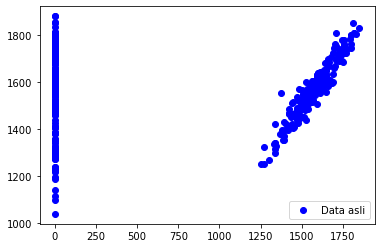

In [41]:
scatterPlot([{
    "x": df["open_price"],
    "y": df["close"],
    "color": "blue",
    "label": "Data asli"
}])

In [12]:
dfFeature = pd.DataFrame(feature)
dfFeature

,0,1,2,3,4,5,6
0,0.904762,0.000000,0.000000,0.898876,0.904762,0.406780,0.002480
1,0.904762,0.000000,0.000000,0.915730,0.910714,0.423729,0.004327
2,0.910714,0.000000,0.000000,0.926966,0.946429,0.508475,0.007910
3,0.946429,0.000000,0.000000,0.882022,0.851190,0.135593,0.019061
4,0.851190,0.000000,0.000000,0.837079,0.803571,0.271186,0.021628
...,...,...,...,...,...,...,...
474,0.339286,0.724324,0.723577,0.410112,0.452381,0.728814,0.036638
475,0.452381,0.770270,0.772358,0.511236,0.529762,0.627119,0.048871
476,0.529762,0.810811,0.815718,0.595506,0.625000,0.677966,0.079571
477,0.625000,0.848649,0.850949,0.640449,0.630952,0.423729,0.051055


In [13]:
dfFeature.describe()

,0,1,2,3,4,5,6
count,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000
mean,0.639514,0.414602,0.415890,0.649457,0.639055,0.405470,0.036660
std,0.177007,0.426972,0.428295,0.170262,0.176479,0.133777,0.066240
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.535714,0.000000,0.000000,0.561798,0.535714,0.322034,0.014257
50%,0.648810,0.000000,0.000000,0.657303,0.648810,0.406780,0.024978
75%,0.773810,0.848649,0.850949,0.766854,0.773810,0.474576,0.039686
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
mpca = PCA(n_components=2)
pcaFeat = mpca.fit_transform(feature)
pcaFeat.shape

(479, 2)

In [15]:
dfPcaFeat = npToDf(pcaFeat, [str(i) for i in range(pcaFeat.shape[1])])
dfPcaFeat

,0,1
0,-0.588811,-0.448760
1,-0.588967,-0.461672
2,-0.589806,-0.491889
3,-0.586386,-0.433723
4,-0.587150,-0.324286
...,...,...
474,0.435110,0.419584
475,0.502478,0.250563
476,0.560976,0.102283
477,0.614469,0.016395


In [16]:
dfPcaFeat.describe()

,0,1
count,4.790000e+02,4.790000e+02
mean,2.656191e-16,-8.645369e-17
std,6.047917e-01,3.000486e-01
min,-5.920747e-01,-6.170414e-01
25%,-5.875209e-01,-2.279233e-01
50%,-5.834008e-01,-2.027495e-02
75%,6.150928e-01,1.690978e-01
max,8.256850e-01,1.074148e+00


In [17]:
normalize(feature)

array([[0.9047619 , 0.        , 0.        , ..., 0.9047619 , 0.40677966,
        0.00248047],
       [0.9047619 , 0.        , 0.        , ..., 0.91071429, 0.42372881,
        0.00432737],
       [0.91071429, 0.        , 0.        , ..., 0.94642857, 0.50847458,
        0.00791045],
       ...,
       [0.5297619 , 0.81081081, 0.81571816, ..., 0.625     , 0.6779661 ,
        0.07957053],
       [0.625     , 0.84864865, 0.85094851, ..., 0.63095238, 0.42372881,
        0.05105484],
       [0.63095238, 0.84864865, 0.85094851, ..., 0.60119048, 0.3220339 ,
        0.01622409]])

In [18]:
mainx = pcaFeat.T
# mainx
npToDf(mainx, [str(i) for i in range(mainx.shape[1])])

,0,1,2,3,4,5,6,7,8,9,...,469,470,471,472,473,474,475,476,477,478
0,-0.588811,-0.588967,-0.589806,-0.586386,-0.587150,-0.587262,-0.588523,-0.588607,-0.588373,-0.588432,...,0.437325,0.410631,0.389494,0.373572,0.382701,0.435110,0.502478,0.560976,0.614469,0.615307
1,-0.448760,-0.461672,-0.491889,-0.433723,-0.324286,-0.237377,-0.222993,-0.278759,-0.273776,-0.302937,...,0.528625,0.589803,0.637456,0.651783,0.585075,0.419584,0.250563,0.102283,0.016395,0.052020


In [19]:
# npToDf(mainy, [str(i) for i in range(mainy.shape[1])])

### 1.1 PPCA

In [20]:
# ppca = pca.ppca.PPCA(q=2, sigma=1.0)
ppca = pca.ppca.PPCA(q=7, sigma=10.0)

In [21]:
def try1():
    ppca = pca.ppca.PPCA()
    data = np.array([
        [1,2,3,4],
        [1,2,3,2],
        [1,2,3,4],
    ])
    data = mainx
    ppca.fit(data, em=True).ell(
        data, 
        np.array([1]), 
        1
    )

In [22]:
# EM
ppca.fit(mainx, em=True)
ppcaTransformed = ppca.transform()
dfppca = npToDf(
    ppcaTransformed.T, 
    [str(i) for i in range(ppcaTransformed.shape[0])]
)
dfppca

,0,1,2,3,4,5,6
0,-0.455136,-0.039662,-0.513385,-0.371876,-0.234196,-0.119829,-0.193187
1,-0.455256,-0.039673,-0.513521,-0.371974,-0.234258,-0.119861,-0.193238
2,-0.455903,-0.039730,-0.514253,-0.372505,-0.234591,-0.120032,-0.193514
3,-0.453261,-0.039498,-0.511270,-0.370344,-0.233231,-0.119336,-0.192391
4,-0.453856,-0.039545,-0.511933,-0.370826,-0.233536,-0.119492,-0.192639
...,...,...,...,...,...,...,...
474,0.336325,0.029312,0.379374,0.274803,0.173061,0.088549,0.142760
475,0.388407,0.033841,0.438107,0.317350,0.199859,0.102260,0.164858
476,0.433631,0.037773,0.489107,0.354296,0.223128,0.114166,0.184047
477,0.474984,0.041371,0.535745,0.388080,0.244406,0.125053,0.201595


In [23]:
dfFeature

,0,1,2,3,4,5,6
0,0.904762,0.000000,0.000000,0.898876,0.904762,0.406780,0.002480
1,0.904762,0.000000,0.000000,0.915730,0.910714,0.423729,0.004327
2,0.910714,0.000000,0.000000,0.926966,0.946429,0.508475,0.007910
3,0.946429,0.000000,0.000000,0.882022,0.851190,0.135593,0.019061
4,0.851190,0.000000,0.000000,0.837079,0.803571,0.271186,0.021628
...,...,...,...,...,...,...,...
474,0.339286,0.724324,0.723577,0.410112,0.452381,0.728814,0.036638
475,0.452381,0.770270,0.772358,0.511236,0.529762,0.627119,0.048871
476,0.529762,0.810811,0.815718,0.595506,0.625000,0.677966,0.079571
477,0.625000,0.848649,0.850949,0.640449,0.630952,0.423729,0.051055


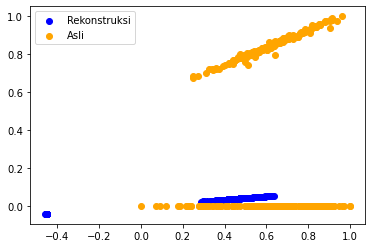

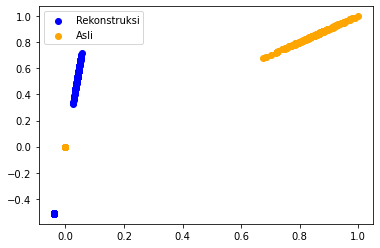

In [29]:
scatterPlot([{
    "x": dfppca["0"],
    "y": dfppca["1"],
    "color": "blue",
    "label": "Rekonstruksi"
},{
    "x": dfFeature[0],
    "y": dfFeature[1],
    "color": "orange",
    "label": "Asli"
}
])

scatterPlot([{
    "x": dfppca["1"],
    "y": dfppca["2"],
    "color": "blue",
    "label": "Rekonstruksi"
},{
    "x": dfFeature[1],
    "y": dfFeature[2],
    "color": "orange",
    "label": "Asli"
}
])

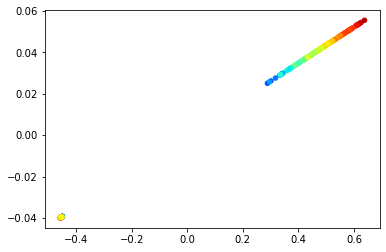

In [26]:
plot_scatter(ppcaTransformed, mainy)